In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
pd.set_option("display.max_columns",None)

In [4]:
sns.set_style("whitegrid")

In [5]:
df=pd.read_csv("data.csv")

In [6]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [8]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
df.shape

(1000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df["Job"].unique()

array([2, 1, 3, 0])

In [13]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df=df.dropna().reset_index(drop=True)

In [16]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad


In [17]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [18]:
df.drop(columns= "Unnamed: 0", inplace=True)

In [19]:
df.columns


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

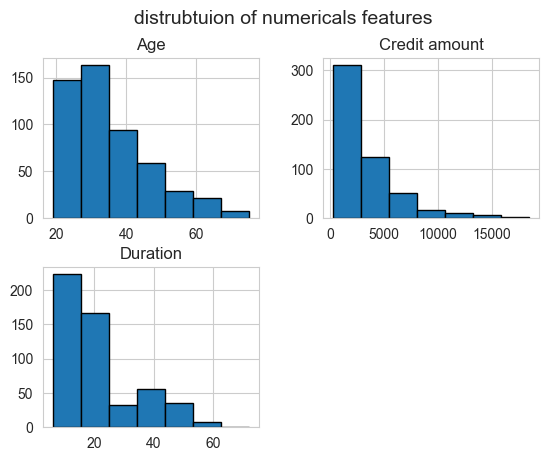

In [20]:
df[["Age","Credit amount","Duration"]].hist(bins=7,edgecolor="black")
plt.suptitle("distrubtuion of numericals features",fontsize=14)
plt.show()

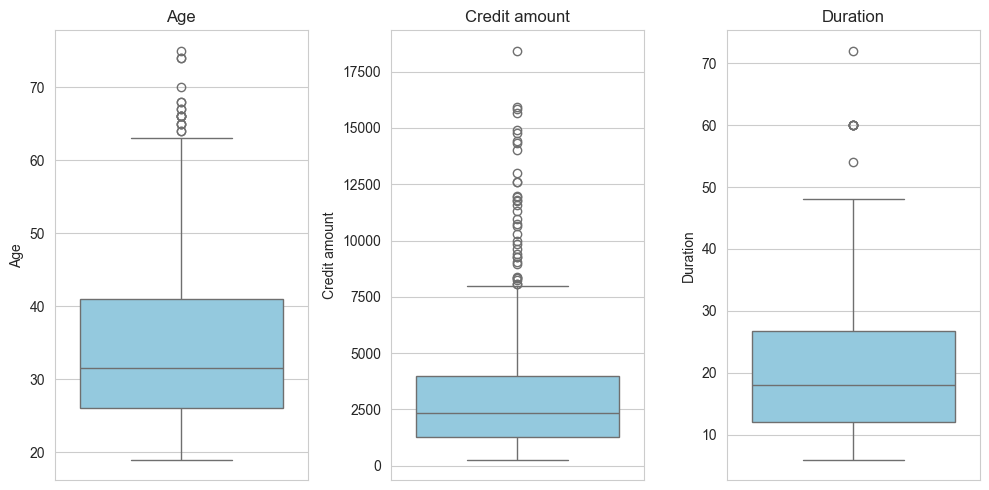

In [21]:
plt.figure(figsize=(10,5))
for i ,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [22]:
df.query("Duration>=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [23]:
categorical_col=["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

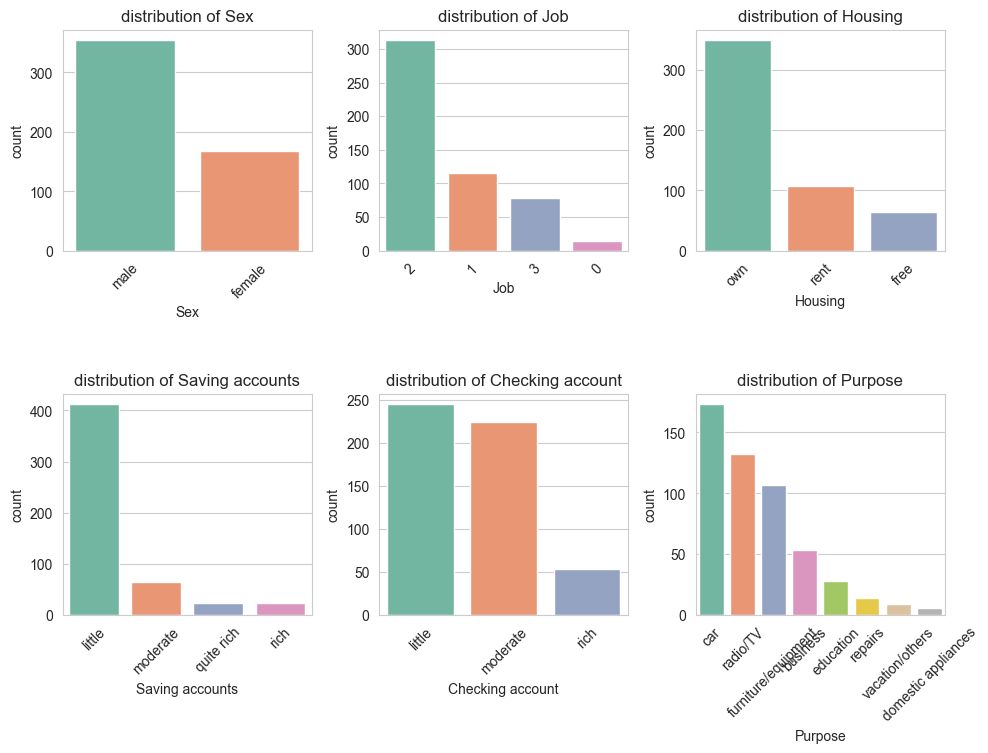

In [24]:
plt.figure(figsize=(10,10))
for i ,col in enumerate (categorical_col):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette="Set2",order=df[col].value_counts().index)
    plt.title(f"distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
corr=df[["Age","Job","Credit amount","Duration"]].corr()

In [26]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Axes: >

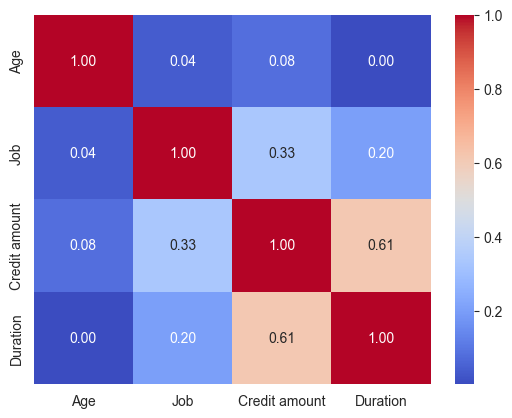

In [27]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")

In [28]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [29]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [30]:
pd.pivot_table(df,values="Credit amount",index="Housing",columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


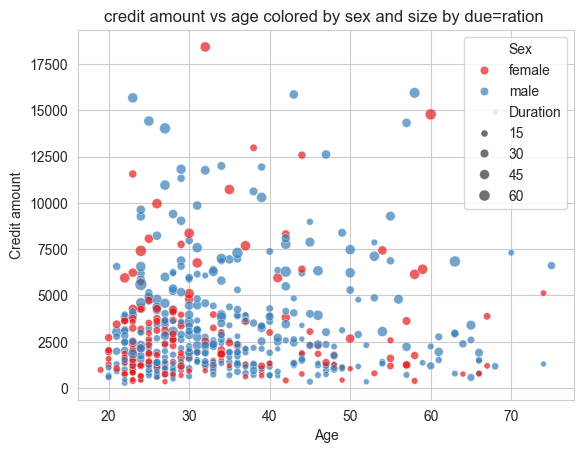

In [31]:
sns.scatterplot(data=df,x="Age",y="Credit amount",hue="Sex",size="Duration",alpha=0.7,palette="Set1")
plt.title("credit amount vs age colored by sex and size by due=ration ")
plt.show()

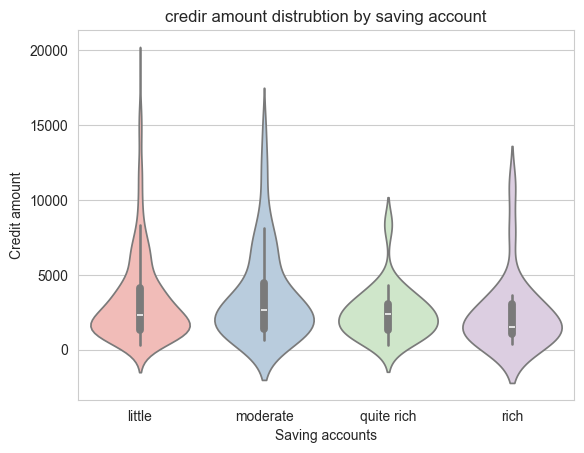

In [32]:
sns.violinplot(data=df,x="Saving accounts",y="Credit amount",palette="Pastel1")
plt.title("credir amount distrubtion by saving account")
plt .show()

In [33]:
df["Risk"].value_counts(normalize=True)

Risk
good    0.557471
bad     0.442529
Name: proportion, dtype: float64

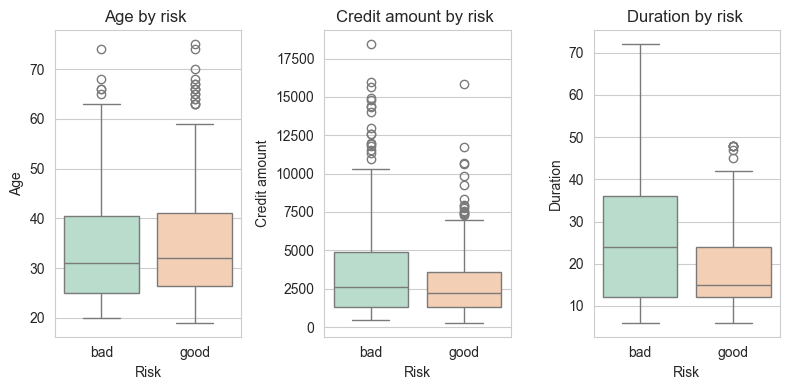

In [34]:
plt.figure(figsize=(8,4))
for i, col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")
    plt.title(f"{col} by risk ")
plt.tight_layout()
plt.show()

In [35]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [36]:
categorical_col

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

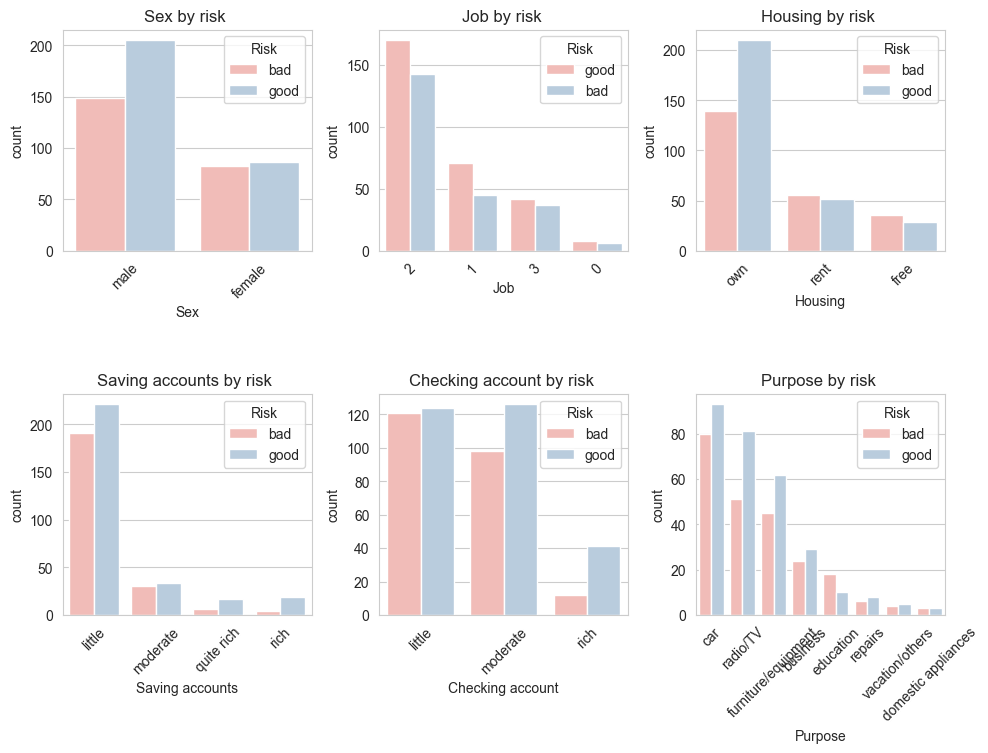

In [37]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue="Risk",palette="Pastel1",order=df[col].value_counts().index)
    plt.title(f"{col} by risk ")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [39]:
features =["Age","Job","Housing","Saving accounts","Credit amount","Checking account","Sex","Duration"]

In [40]:
target="Risk"

In [41]:
df_model=df[features +[target]].copy()

In [42]:
df_model.head()

,Age,Job,Housing,Saving accounts,Credit amount,Checking account,Sex,Duration,Risk
0,22,2,own,little,5951,moderate,female,48,bad
1,45,2,free,little,7882,little,male,42,good
2,53,2,free,little,4870,little,male,24,bad
3,35,3,rent,little,6948,moderate,male,36,good
4,28,3,own,little,5234,moderate,male,30,bad


In [43]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [44]:
cat_cols=df_model.select_dtypes(include="object").columns.drop("Risk")

In [45]:
le_dict={}

In [46]:
for col in cat_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col]=le
    joblib.dump(le,f"{col}_encoder.pkl")

In [47]:
le_target=LabelEncoder()
df_model[target]=le.fit_transform(df_model[target])

In [48]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [49]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [50]:
df_model.head()

,Age,Job,Housing,Saving accounts,Credit amount,Checking account,Sex,Duration,Risk
0,22,2,1,0,5951,1,0,48,0
1,45,2,0,0,7882,0,1,42,1
2,53,2,0,0,4870,0,1,24,0
3,35,3,2,0,6948,1,1,36,1
4,28,3,1,0,5234,1,1,30,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x=df_model.drop(target,axis=1)

In [53]:
y=df_model[target]

In [54]:
x

,Age,Job,Housing,Saving accounts,Credit amount,Checking account,Sex,Duration
0,22,2,1,0,5951,1,0,48
1,45,2,0,0,7882,0,1,42
2,53,2,0,0,4870,0,1,24
3,35,3,2,0,6948,1,1,36
4,28,3,1,0,5234,1,1,30
...,...,...,...,...,...,...,...,...
517,48,1,1,0,1743,1,1,24
518,30,3,1,0,3959,0,1,36
519,40,3,1,0,3857,0,1,30
520,23,2,0,0,1845,0,1,45


In [55]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.2 , stratify=y,random_state=1)

In [60]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [75]:
def train_model(model,param_grid,x_train,y_train,x_test,y_test):
    grid=GridSearchCV(model,param_grid,cv=5,scoring ="accuracy",n_jobs=-1)
    grid.fit(x_train,y_train)
    best_model=grid.best_estimator_
    y_pred=best_model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    return best_model,acc,grid.best_params_

In [76]:
dt=DecisionTreeClassifier(random_state=1,class_weight="balanced")

In [77]:
dt_params_grid={
    "max_depth":[3,5,7,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [78]:
best_dt,acc_dt,params_dt=train_model(dt,dt_params_grid,x_train,y_train,x_test,y_test)

In [80]:
print("decision tree accuracy",acc_dt)

decision tree accuracy 0.5904761904761905


In [81]:
print("decision tree best params",params_dt)

decision tree best params {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [79]:
rf=RandomForestClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

In [83]:
rf_params_grid={
    "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}


In [85]:
print("random forest accuracy",acc_dt)
print("random forest best parameters" ,params_rf)

random forest accuracy 0.6190476190476191
random forest best parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [87]:
et=ExtraTreesClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

In [88]:
et_params_grid={
     "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [89]:
best_et,acc_et,params_et=train_model(et,et_params_grid,x_train,y_train,x_test,y_test)

In [90]:
print("extratrees accuracy",acc_et)
print("extratrees best paramatrs",params_et)

extratrees accuracy 0.6857142857142857
extratrees best paramatrs {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [92]:
xg=XGBClassifier(random_state=1,scale_pos=(y_train==0).sum()/(y_train==1).sum(),use_label_encoder=False,eval_metric="logloss")

In [101]:
xg_params_grid={
    "n_estimators":[100,200],
    "max_depth":[3,4,7,None],
    "learning_rate":[0.01,0.1,0.2],
    "subsample":[0.7,1],
    "colsample_bytree":[0.7,1]
}


In [102]:
best_xg,acc_xg,params_xg=train_model(xg,xg_params_grid,x_train,y_train,x_test,y_test)

[13:15:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [103]:
print("xgb accuracy",acc_xg)
print("xg best parameters",params_xg)

xgb accuracy 0.6761904761904762
xg best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [104]:
best_et.predict(x_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [105]:
joblib.dump(best_et,"extratree_model.pkl")

['extratree_model.pkl']